In [1]:
## This project is aiming at predict the price range of a mobile phone
# based on various features

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import keras
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
file_path = "/content/gdrive/My Drive/anly590-datasets/train.csv"
train = pd.read_csv(file_path)

In [4]:
train.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [6]:
# train set contains 2000 observations and the test set contains 1000
# look at the structure of the dataset
train.info()
# we have 20 predictors and 1 response variables

"""
Description of the predictors
id:ID
battery_power:Total energy a battery can store in one time measured in mAh
blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

'\nDescription of the predictors\nid:ID\nbattery_power:Total energy a battery can store in one time measured in mAh\nblue:Has bluetooth or not\nclock_speed:speed at which microprocessor executes instructions\ndual_sim:Has dual sim support or not\nfc:Front Camera mega pixels\nfour_g:Has 4G or not\nint_memory:Internal Memory in Gigabytes\nm_dep:Mobile Depth in cm\nmobile_wt:Weight of mobile phone\nn_cores:Number of cores of processor\npc:Primary Camera mega pixels\npx_height:Pixel Resolution Height\npx_width:Pixel Resolution Width\nram:Random Access Memory in Megabytes\nsc_h:Screen Height of mobile in cm\nsc_w:Screen Width of mobile in cm\ntalk_time:longest time that a single battery charge will last when you are\nthree_g:Has 3G or not\ntouch_screen:Has touch screen or not\nwifi:Has wifi or not\n'

[1 2 3 0]


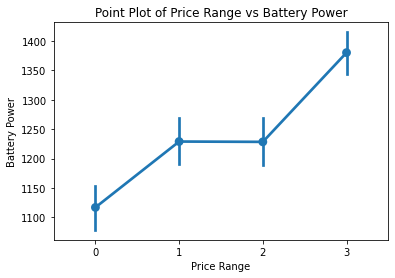

<Figure size 432x288 with 0 Axes>

In [6]:
# look at how many price levels we have
uniq_price = train['price_range'].unique()
print(uniq_price)

# According to the author of the dataset, the target variables are
# 0 (low cost)
# 1 (medium cost)
# 2 (high cost)
# 3 (very high cost)

### EDA and Visualizations
# We first look at a pairplot
#sns.pairplot(train,hue='price_range')

# explore how numeric variables are related to the price range
battery_plt=sns.pointplot(y="battery_power", x="price_range", data=train)
battery_plt.set_title('Point Plot of Price Range vs Battery Power')
battery_plt.set_xlabel('Price Range')
battery_plt.set_ylabel('Battery Power')
plt.show()
plt.clf()

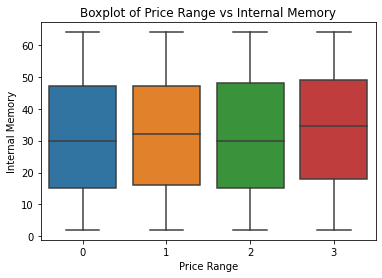

<Figure size 432x288 with 0 Axes>

In [7]:
# The average battery power increases dramatically from price 0 to 1, and price range
# 2 to 3. But remain constant from 1 to 2. 
memory_plt = sns.boxplot(x="price_range", y="int_memory", data=train)
memory_plt.set_title('Boxplot of Price Range vs Internal Memory')
memory_plt.set_xlabel('Price Range')
memory_plt.set_ylabel('Internal Memory')
plt.show()
plt.clf()
# Phones of all those categories have similar range of memory, only minor differences
# in median values

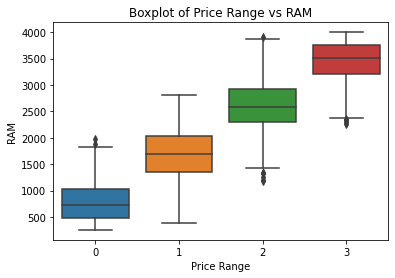

'\nIt seems like the median/min/max RAM increases as price increases. \n'

<Figure size 432x288 with 0 Axes>

In [8]:
# ram vs price
ram_plt = sns.boxplot(x="price_range", y="ram", data=train)
ram_plt.set_title('Boxplot of Price Range vs RAM')
ram_plt.set_xlabel('Price Range')
ram_plt.set_ylabel('RAM')
plt.show()
plt.clf()
"""
It seems like the median/min/max RAM increases as price increases. 
"""


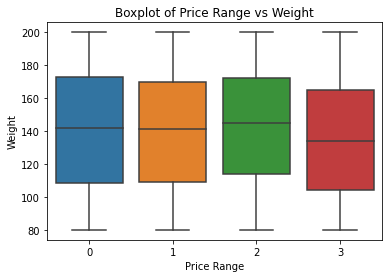

'\nThe median/min/max weight of price range 3 is less than the first three groups.\n'

<Figure size 432x288 with 0 Axes>

In [9]:
# weight vs price
wgt_plt = sns.boxplot(x="price_range", y="mobile_wt", data=train)
wgt_plt.set_title('Boxplot of Price Range vs Weight')
wgt_plt.set_xlabel('Price Range')
wgt_plt.set_ylabel('Weight')
plt.show()
plt.clf()
"""
The median/min/max weight of price range 3 is less than the first three groups.
"""

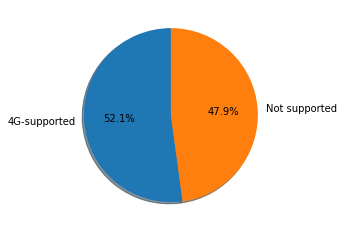

'\nMore than half of the phones support 4G\n'

<Figure size 432x288 with 0 Axes>

In [10]:
### categorical variables
# 4G
labels4g = ["4G-supported",'Not supported']
values4g = train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()
plt.clf()
"""
More than half of the phones support 4G
"""

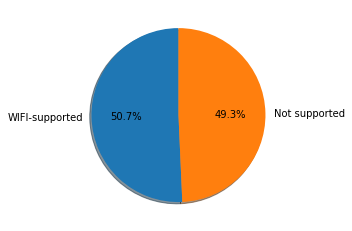

'\nMore than half of the phones support WIFI\n'

<Figure size 432x288 with 0 Axes>

In [11]:
# WIFI
labelswifi = ["WIFI-supported",'Not supported']
valueswifi = train['wifi'].value_counts().values
fig2, ax2 = plt.subplots()
ax2.pie(valueswifi, labels=labelswifi, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()
plt.clf()
"""
More than half of the phones support WIFI
"""


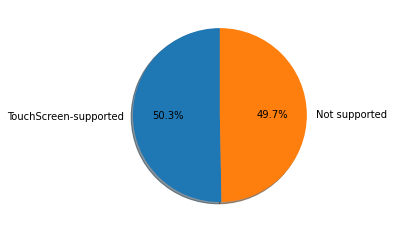

'\nMore than half of the phones has touch screen\n'

<Figure size 432x288 with 0 Axes>

In [12]:
# Touchscreen
labelsscreen = ["TouchScreen-supported",'Not supported']
valuesscreen = train['touch_screen'].value_counts().values
fig2, ax2 = plt.subplots()
ax2.pie(valuesscreen, labels=labelsscreen, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()
plt.clf()
"""
More than half of the phones has touch screen
"""

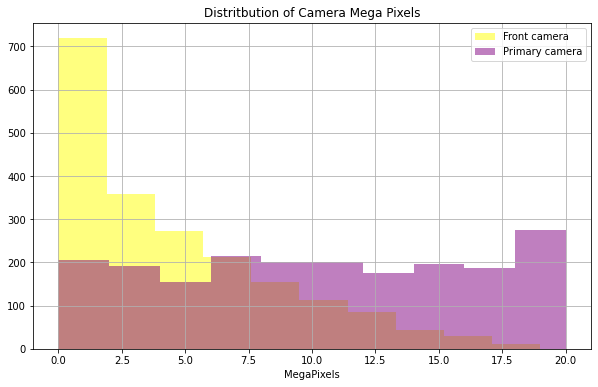

'\nThe distribution of the mega pixel of the front camera is skewed to the right.\nThe distribution of the mega pixel of the primary camera is pretty much uniform.\n'

<Figure size 432x288 with 0 Axes>

In [13]:
# cameras
plt.figure(figsize=(10,6))
train['fc'].hist(alpha=0.5,color='yellow',label='Front camera')
train['pc'].hist(alpha=0.5,color='purple',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.title("Distritbution of Camera Mega Pixels")
plt.show()
plt.clf()

"""
The distribution of the mega pixel of the front camera is skewed to the right.
The distribution of the mega pixel of the primary camera is pretty much uniform.
"""

In [7]:
####### Model Training #######

##### Train Test Split #####
X=train.drop('price_range',axis=1)
y=train['price_range']
# use 40% of the data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=919)


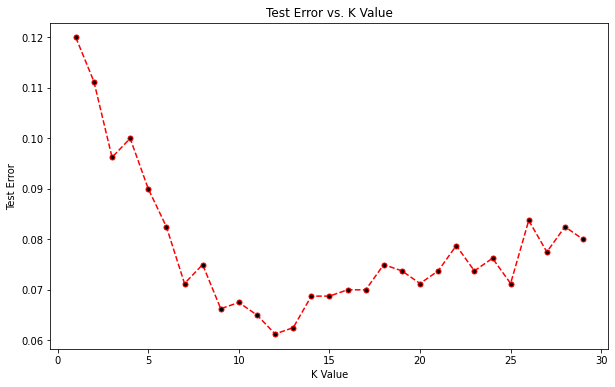

##### The test accuracy of the KNN with K = 12 #####
0.93875


'\n# The test accuracy is 0.93875\n'

<Figure size 432x288 with 0 Axes>

In [16]:
##### KNN #####
# We would first figure out the optimized value of K
KNN_error = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    KNN_error.append(np.mean(preds != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),KNN_error,color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.title('Test Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Test Error')
plt.show()
plt.clf()

"""
As we can see in the plot, K = 12 yields the lowest test error, thus we are going 
to fit the KNN model with K = 12
"""

# fit the model with K = 12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
knn_acc = knn.score(X_test,y_test)
print("##### The test accuracy of the KNN with K = 12 #####")
print(knn_acc)
"""
# The test accuracy is 0.93875
"""

In [30]:
##### Random Forest #####
# We would need to find out the optimized value of n_estimators and max_features
rfc_acc = []
num_estimators = [100, 150, 200, 250, 300]
max_feature = list(range(1, 21))
acc = 0
print('  x   y  accuracy')
for i in num_estimators:
  for j in max_feature:
    rfc = RandomForestClassifier(n_estimators=i, max_features=j, random_state=919)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    score = rfc.score(X_test,y_test)
    print(i, " ", j, " ", score, '\n')
"""n_est=100, max_features=14, acc= 0.92125"""

  x   y  accuracy
100   1   0.67875 

100   2   0.79125 

100   3   0.8425 

100   4   0.865 

100   5   0.8775 

100   6   0.9 

100   7   0.89375 

100   8   0.9 

100   9   0.91 

100   10   0.9075 

100   11   0.89875 

100   12   0.91 

100   13   0.9125 

100   14   0.92125 

100   15   0.91375 

100   16   0.91625 

100   17   0.9125 

100   18   0.9075 

100   19   0.90625 

100   20   0.91 

150   1   0.7 

150   2   0.8175 

150   3   0.84875 

150   4   0.87625 

150   5   0.885 

150   6   0.9 

150   7   0.9 

150   8   0.905 

150   9   0.91 

150   10   0.91 

150   11   0.90375 

150   12   0.91 

150   13   0.9125 

150   14   0.91375 

150   15   0.91625 

150   16   0.91125 

150   17   0.91125 

150   18   0.9125 

150   19   0.90625 

150   20   0.9075 

200   1   0.70875 

200   2   0.8225 

200   3   0.8475 

200   4   0.87875 

200   5   0.89125 

200   6   0.9025 

200   7   0.90125 

200   8   0.90875 

200   9   0.90875 

200   10   0.905 

200   11   0.905 


' 100 14  0.92125'

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_train)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

svm2 = SVC(kernel = 'rbf')
clf_svm = svm2.fit(Xreduced, y_train)

### SVM C = 10
svm3 = SVC(kernel = 'rbf',C=10)
clf_svm_10 = svm3.fit(Xreduced, y_train)

### SVM C = 10, gamma = 1
svm4 = SVC(kernel = 'rbf',C=10,gamma = 1)
clf_svm_1 = svm4.fit(Xreduced, y_train)

# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

### SVM
fig, (ax,ax1,ax2) = plt.subplots(3,1)
fig.suptitle('Compare different C and gamma')

##plot
plot_contours(ax, clf_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('C = 1',x = 0.8,y = 0.9)

plot_contours(ax1, clf_svm_10, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_ylabel('PC2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('C=10',x = 0.8,y = 0.9)

plot_contours(ax1, clf_svm_10, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_ylabel('PC2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('C=10',x = 0.8,y = 0.9)

plot_contours(ax2, clf_svm_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_ylabel('PC2')
ax2.set_xlabel('PC1')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('gamma=1,C = 10',x = 0.8,y = 0.9)

In [31]:
##### SVM #####
# using radial basis function kernel
svm = SVC(kernel = 'rbf', random_state = 919)
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test,y_test)
print("##### The test accuracy of the SVM #####")
print(svm_acc)

##### The test accuracy of the SVM #####
0.9475
